# Part II - (Effects of Trip Data Characteristics on Their Duration)
## by (Bill Clinton ogot)



## Investigation Overview


> In this investigation, I wanted to look at the characteristics of trip data that could be used to predict their duration. The main focus was on the five: age, start station, end station, user type, and gender. 


## Dataset Overview

> The data consisted of duration_sec and attributes of approximately 183,412. The attributes included the five, as well as additional measurements such as start station name, start station latitude, and start station longitude

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import io
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# downloading the dataset programatically using requets
folder_name = "ogot"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv"
response = requests.get(url)

In [3]:
# writing the contentinto the file in the directory
with open(os.path.join(folder_name, url.split('/')[-1]), mode="wb") as file:
    file.write(response.content)

In [4]:
# listing to see if the dataset was downloaded
os.listdir(folder_name)

['201902-fordgobike-tripdata.csv', 'fordgobike01.csv']

In [5]:
# reading the dataset
df = pd.read_csv(os.path.join(folder_name, "201902-fordgobike-tripdata.csv"))

In [6]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [7]:
# saving the dataset without the index column
df.to_csv(os.path.join(folder_name, "fordgobike01.csv"), index=False)

In [8]:
# checking to see f the dataset is saved correcly
df1 = pd.read_csv(os.path.join(folder_name, "fordgobike01.csv"))

In [9]:
clean_df1 = df1.copy()

In [10]:
# droping the unecessary column headers
clean_df1.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [11]:
# converting start_time and end_time columns to datetime
clean_df1.start_time = pd.to_datetime(df.start_time)
clean_df1.end_time = pd.to_datetime(df.end_time)

In [12]:
# change the data type for bike_share_for_all_trip to be bool
clean_df1.bike_share_for_all_trip = (clean_df1.bike_share_for_all_trip == 'Yes')

## (Visualization 1 - Trip Duration Distribution)

> Trip Durations in the dataset take on a very large range of values. Number of Trips values first increases starting from around 8000 values to 12500 values at peak around 600 seconds but then starts to fall below at 2000 values.

In [13]:
n_duration = clean_df1["duration_sec"].value_counts().sum()
max_value = clean_df1.shape[0]
min_value = clean_df1.duration_sec[0]
average = max_value/min_value
print(average)

3.51464980358


In [14]:
tick_props = np.arange(0.1, average, 0.4)
tick_name = ['{:0.2f}'.format(v) for v in tick_props]

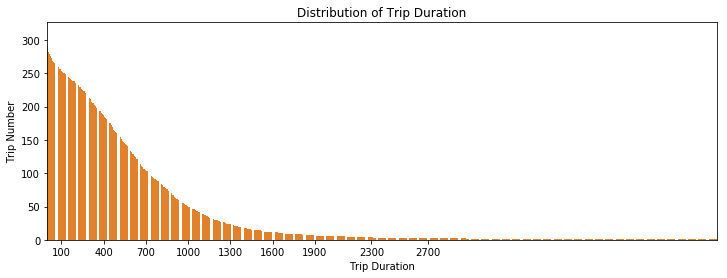

In [15]:
order = clean_df1['duration_sec'].value_counts().index
base_color = sb.color_palette()[1]
plt.figure(figsize=[12, 4])
g = sb.countplot(data = clean_df1, x = "duration_sec", color=base_color, order=order);
g.set_xticks([100, 400, 700, 1000, 1300, 1600, 1900, 2300, 2700])
_ = g.set_xticklabels(["100", "400", "700", "1000", "1300", "1600", "1900", "2300", "2700"])
plt.xlabel("Trip Duration")
plt.ylabel("Trip Number")
plt.title("Distribution of Trip Duration")
plt.show()

## (Visualization 2 - Distribution_sec)

> In the case of trip duration_sec, you can see that the distribution is more consentareted between 0 to 2000.

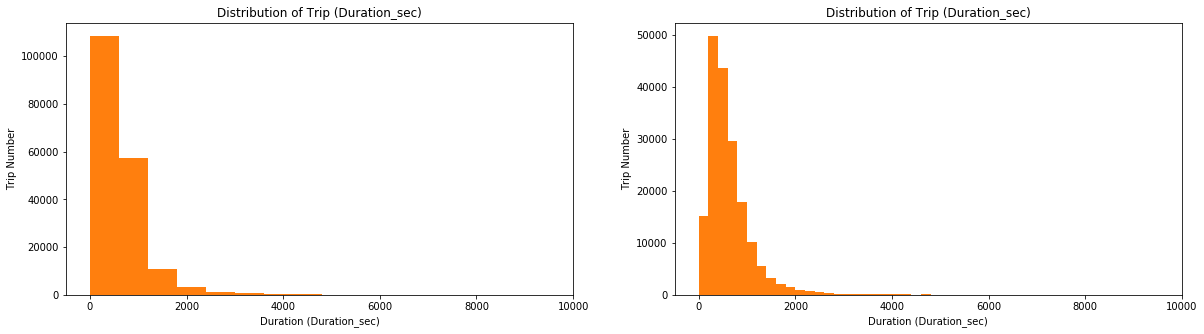

In [16]:
# creating the hit to visualize the trip duration distriution
plt.figure(figsize=[20,5])
plt.subplot(1 ,2 ,1)
color = sb.color_palette()[1]
bins = np.arange(0, clean_df1.duration_sec.max()+600, 600)
plt.hist(data = clean_df1, x = 'duration_sec', bins=bins, color=color)
plt.xlim((-500, 10000))
plt.xlabel('Duration (Duration_sec)')
plt.ylabel('Trip Number')
plt.title('Distribution of Trip (Duration_sec)');


plt.subplot(1 ,2 ,2)
color = sb.color_palette()[1]
bins = np.arange(0, clean_df1.duration_sec.max()+200, 200)
plt.hist(data = clean_df1, x = 'duration_sec', bins=bins, color=color)
plt.xlim((-500, 10000))
plt.xlabel('Duration (Duration_sec)')
plt.ylabel('Trip Number')
plt.title('Distribution of Trip (Duration_sec)');

## (Visualization 3 - User_age distribution)

> most age are distributed between 30 to 40 years


In [17]:
clean_df1["duration_sec"].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [18]:
applied_log = np.log10(clean_df1.duration_sec.min())
applied_log

1.7853298350107671

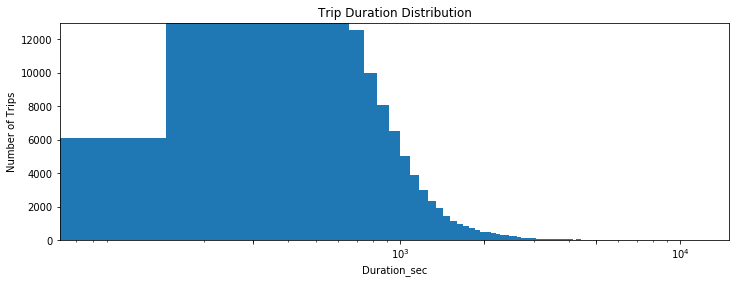

In [19]:
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = 1000
bins_log = 10 ** np.arange(applied_log, np.log10(clean_df1['duration_sec'].max()) + bins, bins)

plt.figure(figsize=[12, 4])
plt.hist(data = clean_df1, x = 'duration_sec', bins = bins)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([300, 1e3, 2e3, 5e3, 1e4])
plt.xlim((0, 15000))
plt.ylim((0, 13000))
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [34]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 322877 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/